In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import re
import string
import wordcloud
import os
from langdetect import detect
from collections import Counter
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import words

In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=db770d1f0a63b917cb147e62e2680f77532ff256d8220df33a27661991d982c5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
df = pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv')

NameError: name 'pd' is not defined

In [7]:
# Check the dimensions of the data
print("Dimension: ",df.shape)

# Number of rows and columns
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])

# Print the column names
column_names = df.columns
print(column_names)

Dimension:  (232074, 3)
Number of rows in data = 232074
Number of columns in data = 3
Index(['Unnamed: 0', 'text', 'class'], dtype='object')


In [8]:
print("Check for missing values in the dataset")
null_check=df.isnull().sum()
print(null_check)

# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the duplicate rows
duplicate_data = df[duplicate_rows]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:")
print(duplicate_data)

Check for missing values in the dataset
Unnamed: 0    0
text          0
class         0
dtype: int64
Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, text, class]
Index: []


class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='class', ylabel='Count'>

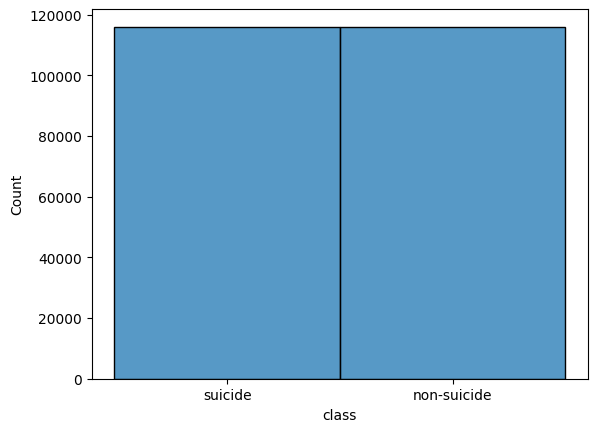

In [11]:
print(df['class'].value_counts())
sns.histplot(df['class'],binwidth=0.5)

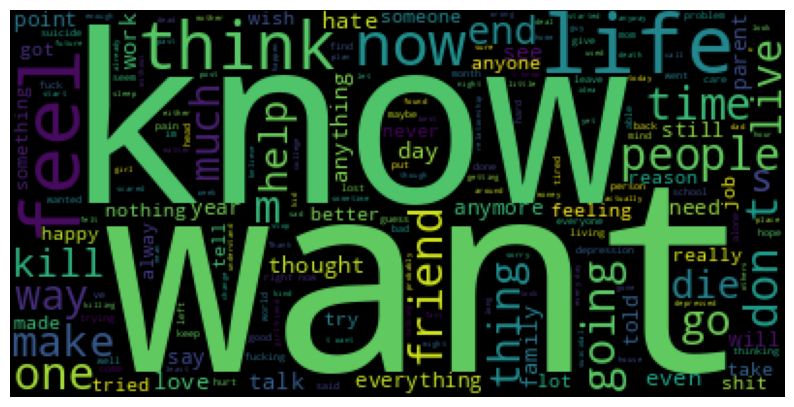

In [12]:
suicide=df[df['class']=='suicide']['text']
xsuicide=df[df['class']=='non-suicide']['text']

def display_cloud(data):
    plt.subplots(figsize=(10,10))
    wc = wordcloud.WordCloud(
                   background_color="black",
                   colormap='viridis',
                   max_words=1000,
                   random_state=24)
    plt.imshow(wc.generate(' '.join(data)))
    plt.axis('off')
    plt.show()

display_cloud(suicide)

/tmp/ipykernel_33/3770042524.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_suicide, ax=ax1, color='Orange')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/3770042524.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function f

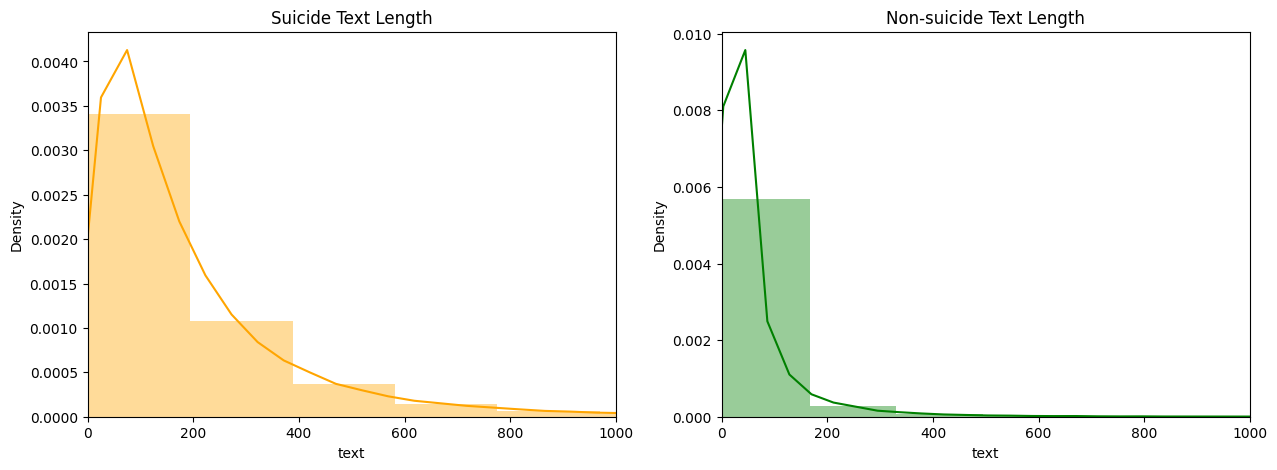

In [13]:
#Analyse the count of words in each segment- both positive and negative reviews
# Function for checking word length
def cal_len(data):
    return len(data)

# Create generic plotter with Seaborn
def plot_count(count_suicide, count_xsuicide, xlim_range=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(count_suicide, ax=ax1, color='Orange')
    ax1.set_title("Suicide Text Length")

    sns.distplot(count_xsuicide, ax=ax2, color='Green')
    ax2.set_title("Non-suicide Text Length")

    # Set x-axis range if specified
    if xlim_range:
        ax1.set_xlim(xlim_range)
        ax2.set_xlim(xlim_range)

    plt.show()

# Assuming you want to set the x-axis range from 0 to 1000
xlim_range = (0, 1000)

count_suicide_words = suicide.str.split().apply(lambda z: cal_len(z))
count_xsuicide_words = xsuicide.str.split().apply(lambda z: cal_len(z))

plot_count(count_suicide_words, count_xsuicide_words, xlim_range)

In [6]:
df['text'] = df['text'].str.lower()
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i don't get affected by compliments...,non-suicide
2,4,finally 2020 is almost over... so i can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"i’m so losthello, my name is adam (16) and i’v...",suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,[trigger warning] excuse for self inflicted bu...,suicide
7,13,it ends tonight.i can’t do it anymore. \ni quit.,suicide
8,16,"everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,my life is over at 20 years oldhello all. i am...,suicide


In [7]:
df['text'] = df['text'].str.replace("’", "'")
df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i don't get affected by compliments...,non-suicide
2,4,finally 2020 is almost over... so i can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"i'm so losthello, my name is adam (16) and i'v...",suicide
5,11,honetly idki dont know what im even doing here...,suicide
6,12,[trigger warning] excuse for self inflicted bu...,suicide
7,13,it ends tonight.i can't do it anymore. \ni quit.,suicide
8,16,"everyone wants to be ""edgy"" and it's making me...",non-suicide
9,18,my life is over at 20 years oldhello all. i am...,suicide


In [8]:
abb = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "dont": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "idk": "i do not know",
  "he'd've": "he would have",
  "he'll": "he will",  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "im": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is", "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have", "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",      "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have", "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have", "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

abb_re = re.compile('(%s)' % '|'.join(abb.keys()))

def expandContractions(text, abb_re=abb_re):
    def replace(match):
        return abb[match.group(0)]
    return abb_re.sub(replace, text)

df['text'] = df['text'].apply(expandContractions)

df.head(10)

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,suicide
1,3,am i weird i do not get affected by compli ame...,non-suicide
2,4,finally 2020 is almost over... so i can never ...,non-suicide
3,8,i need helpjust help me i am crying so hard,suicide
4,9,"i am so losthello, my name is adam (16) and i ...",suicide
5,11,honetly i do not knowi do not know what i am e...,suicide
6,12,[trigger warning] excuse for self inflicted bu...,suicide
7,13,it ends tonight.i cannot do it anymore. \ni quit.,suicide
8,16,"everyone wants to be ""edgy"" and it is making m...",non-suicide
9,18,my life is over at 20 years oldhello all. i am...,suicide


In [10]:
#os.remove('/kaggle/working/Current.csv')
df.to_csv('Current.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

In [57]:
df = pd.read_csv('/kaggle/working/Current.csv')

In [14]:
device_name=tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [12]:
import tensorflow as tf
from tqdm.notebook import tqdm_notebook
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
def apply_with_progress(column):
    with tqdm_notebook(total=len(column)) as pbar:
        def preprocess_fn(text):
            pbar.update()
            return tokenize_text(text)

        column = column.dropna()
        processed_texts = column.apply(preprocess_fn)
        return pd.Series(processed_texts, index=column.index)
with tf.device("/device:GPU:0"):
    df['text'] = apply_with_progress(df['text'])
os.remove('/kaggle/working/Current.csv')
df.to_csv('Current.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

2024-04-23 03:41:20.112319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 03:41:20.112447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 03:41:20.363274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


  0%|          | 0/232074 [00:00<?, ?it/s]

In [13]:
!pip install wordninja

import pandas as pd
import wordninja
import re

import pandas as pd
import nltk
import wordninja
from tqdm import tqdm  # Import tqdm for progress bar
nltk.download('punkt')

# Function to tokenize text using wordninja.split
def tokenize_with_wordninja(text):
    tokens = wordninja.split(" ".join(text))
    return tokens

# tqdm wrapper function
def apply_with_progress(column):
    with tqdm(total=len(column)) as pbar:  # Initialize tqdm progress bar
        # Define a function to update the progress bar
        def update_pbar(*args):
            pbar.update()
            return tokenize_with_wordninja(*args)
        
        # Apply tokenization with progress bar
        return column.apply(update_pbar)

# Apply tokenization with progress bar
df['text'] = apply_with_progress(df['text'])

# Display the DataFrame
df.head(10)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 2.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541529 sha256=7a6af3e7dcc51e7877a4249b9c2bb8e3090072f0953538d60bc7ae108bd08773
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 232074/232074 [15:42<00:00, 246.16it/s]


,Unnamed: 0,text,class
0,2,"[ex, wife, threatening, suicide, recently, i, ...",suicide
1,3,"[am, i, weird, i, do, not, get, affected, by, ...",non-suicide
2,4,"[finally, 2020, is, almost, over, so, i, can, ...",non-suicide
3,8,"[i, need, help, just, help, me, i, am, crying,...",suicide
4,9,"[i, am, so, lost, hello, my, name, is, adam, 1...",suicide
5,11,"[hone, t, ly, i, do, not, know, i, do, not, kn...",suicide
6,12,"[trigger, warning, excuse, for, self, inflicte...",suicide
7,13,"[it, ends, tonight, i, can, not, do, it, anymo...",suicide
8,16,"[everyone, wants, to, be, edgy, ', ', and, it,...",non-suicide
9,18,"[my, life, is, over, at, 20, years, old, hello...",suicide


In [14]:
os.remove('/kaggle/working/Current.csv')
df.to_csv('Current.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

In [ ]:
df = pd.read_csv('/kaggle/working/Current.csv')

In [17]:
from nltk.corpus import stopwords
from tqdm import tqdm  # Import tqdm for progress bar
nltk.download('stopwords')
nltk.download('punkt')

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    tokens_without_stopwords = [
        token for token in tokens if token.lower() not in stop_words]
    return tokens_without_stopwords

# Function to remove punctuation from a list of tokens
def remove_punctuation(tokens):
    tokens_without_punctuation = [token for token in tokens if token.isalnum()]
    return tokens_without_punctuation

# Function to remove numbers from a list of tokens
def remove_numbers(tokens):
    tokens_without_numbers = [token for token in tokens if not token.isdigit()]
    return tokens_without_numbers

# tqdm wrapper function
def apply_with_progress(column, func):
    with tqdm(total=len(column)) as pbar:  # Initialize tqdm progress bar
        # Define a function to update the progress bar
        def update_pbar(*args):
            pbar.update()
            return func(*args)
        
        # Apply the function with progress bar
        return column.apply(update_pbar)

# Apply the functions to the text column in the DataFrame with tqdm wrapper
df['text'] = apply_with_progress(df['text'], remove_stopwords)
df['text'] = apply_with_progress(df['text'], remove_punctuation)
df['text'] = apply_with_progress(df['text'], remove_numbers)

# Display the DataFrame
df.head(10)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 232074/232074 [00:02<00:00, 92303.28it/s]


,Unnamed: 0,text,class
0,2,"[ex, wife, threatening, suicide, recently, lef...",suicide
1,3,"[weird, get, affected, comp, li, ment, coming,...",non-suicide
2,4,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,8,"[need, help, help, crying, hard]",suicide
4,9,"[lost, hello, name, adam, struggling, years, a...",suicide
5,11,"[hone, ly, know, know, even, feel, like, nothi...",suicide
6,12,"[trigger, warning, excuse, self, inflicted, bu...",suicide
7,13,"[ends, tonight, anymore, quit]",suicide
8,16,"[everyone, wants, edgy, making, self, consciou...",non-suicide
9,18,"[life, years, old, hello, year, old, balding, ...",suicide


In [18]:
os.remove('/kaggle/working/Current.csv')
df.to_csv('Current.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

In [19]:
import re
from tqdm import tqdm  # Import tqdm for progress bar

# Function to remove extra whitespaces from each word in a list
def remove_whitespace(tokens):
    cleaned_tokens = [token.strip() for token in tokens]
    return cleaned_tokens

# Function to remove symbols and digits from each word in a list
def remove_symbols_digits(tokens):
    cleaned_tokens = [re.sub('[^a-zA-Z\s]', ' ', token) for token in tokens]
    return cleaned_tokens

# Function to remove special characters from each word in a list
def remove_special(tokens):
    cleaned_tokens = [token.replace("\r", " ").replace("\n", " ") for token in tokens]
    return cleaned_tokens

# tqdm wrapper function
def apply_with_progress(column, func):
    with tqdm(total=len(column)) as pbar:  # Initialize tqdm progress bar
        # Define a function to update the progress bar
        def update_pbar(*args):
            pbar.update()
            return func(*args)
        
        # Apply the function with progress bar
        return column.apply(update_pbar)

# Apply other preprocessing functions with tqdm wrapper
df['text'] = apply_with_progress(df['text'], remove_whitespace)
df['text'] = apply_with_progress(df['text'], remove_symbols_digits)
df['text'] = apply_with_progress(df['text'], remove_special)

# Display the DataFrame
df.head(10)


100%|██████████| 232074/232074 [00:06<00:00, 35892.62it/s]


,Unnamed: 0,text,class
0,2,"[ex, wife, threatening, suicide, recently, lef...",suicide
1,3,"[weird, get, affected, comp, li, ment, coming,...",non-suicide
2,4,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,8,"[need, help, help, crying, hard]",suicide
4,9,"[lost, hello, name, adam, struggling, years, a...",suicide
5,11,"[hone, ly, know, know, even, feel, like, nothi...",suicide
6,12,"[trigger, warning, excuse, self, inflicted, bu...",suicide
7,13,"[ends, tonight, anymore, quit]",suicide
8,16,"[everyone, wants, edgy, making, self, consciou...",non-suicide
9,18,"[life, years, old, hello, year, old, balding, ...",suicide


In [20]:
import re
from tqdm import tqdm  # Import tqdm for progress bar

# Function to remove URLs from a list of strings
def remove_url(tokens):
    cleaned_tokens = [re.sub(r'http\S+', '', token) for token in tokens]
    return cleaned_tokens

# Function to remove email addresses from a list of strings
def remove_mail(tokens):
    cleaned_tokens = [re.sub(r'\S+@\S+', '', token) for token in tokens]
    return cleaned_tokens

# Function to remove emojis from a list of strings
def remove_emoji(tokens):
    cleaned_tokens = [re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', token) for token in tokens]
    return cleaned_tokens

# tqdm wrapper function
def apply_with_progress(column, func):
    with tqdm(total=len(column)) as pbar:  # Initialize tqdm progress bar
        # Define a function to update the progress bar
        def update_pbar(*args):
            pbar.update()
            return func(*args)
        
        # Apply the function with progress bar
        return column.apply(update_pbar)

# Apply the functions to the 'text' column with tqdm wrapper
df['text'] = apply_with_progress(df['text'], remove_url)
df['text'] = apply_with_progress(df['text'], remove_mail)
df['text'] = apply_with_progress(df['text'], remove_emoji)

# Display the DataFrame
df.head(10)

100%|██████████| 232074/232074 [00:27<00:00, 8524.83it/s]


,Unnamed: 0,text,class
0,2,"[ex, wife, threatening, suicide, recently, lef...",suicide
1,3,"[weird, get, affected, comp, li, ment, coming,...",non-suicide
2,4,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,8,"[need, help, help, crying, hard]",suicide
4,9,"[lost, hello, name, adam, struggling, years, a...",suicide
5,11,"[hone, ly, know, know, even, feel, like, nothi...",suicide
6,12,"[trigger, warning, excuse, self, inflicted, bu...",suicide
7,13,"[ends, tonight, anymore, quit]",suicide
8,16,"[everyone, wants, edgy, making, self, consciou...",non-suicide
9,18,"[life, years, old, hello, year, old, balding, ...",suicide


In [21]:
os.remove('/kaggle/working/Current.csv')
df.to_csv('Current.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

In [22]:
df['text'] = df['text'].apply(lambda x: [word for word in x if len(word) > 2])
df.head(10)

,Unnamed: 0,text,class
0,2,"[wife, threatening, suicide, recently, left, w...",suicide
1,3,"[weird, get, affected, comp, ment, coming, som...",non-suicide
2,4,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,8,"[need, help, help, crying, hard]",suicide
4,9,"[lost, hello, name, adam, struggling, years, a...",suicide
5,11,"[hone, know, know, even, feel, like, nothing, ...",suicide
6,12,"[trigger, warning, excuse, self, inflicted, bu...",suicide
7,13,"[ends, tonight, anymore, quit]",suicide
8,16,"[everyone, wants, edgy, making, self, consciou...",non-suicide
9,18,"[life, years, old, hello, year, old, balding, ...",suicide


In [23]:
import spacy
from tqdm import tqdm  # Import tqdm for progress bar

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize tokens using spaCy
def lemmatize_tokens(tokens):
    # Join the tokens back into a sentence
    text = ' '.join(tokens)
    # Process the text using spaCy
    doc = nlp(text)
    # Lemmatize each token and return the lemmatized tokens
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# tqdm wrapper function
def apply_with_progress(column, func):
    with tqdm(total=len(column)) as pbar:  # Initialize tqdm progress bar
        # Define a function to update the progress bar
        def update_pbar(*args):
            pbar.update()
            return func(*args)
        
        # Apply the function with progress bar
        return column.apply(update_pbar)

# Apply lemmatization to the tokenized text column with tqdm wrapper
df['text'] = apply_with_progress(df['text'], lemmatize_tokens)

# Display the DataFrame
df.head(10)

100%|██████████| 232074/232074 [50:05<00:00, 77.21it/s]  


,Unnamed: 0,text,class
0,2,"[wife, threaten, suicide, recently, leave, wif...",suicide
1,3,"[weird, get, affect, comp, ment, come, someone...",non-suicide
2,4,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,8,"[need, help, help, cry, hard]",suicide
4,9,"[lose, hello, name, adam, struggle, year, afra...",suicide
5,11,"[hone, know, know, even, feel, like, nothing, ...",suicide
6,12,"[trigger, warn, excuse, self, inflict, burn, k...",suicide
7,13,"[end, tonight, anymore, quit]",suicide
8,16,"[everyone, want, edgy, make, self, conscious, ...",non-suicide
9,18,"[life, year, old, hello, year, old, bald, male...",suicide


In [24]:
os.remove('/kaggle/working/Current.csv')
df.to_csv('Current.csv', index=False)  # Set index=False to exclude row numbers in the CSV file

In [7]:
df=pd.read_csv('/kaggle/input/preprocessed/output1.csv')
df.head(10)

,Unnamed: 0,text,class
0,2,"[wife, threaten, suicide, recently, leave, wif...",suicide
1,3,"[weird, get, affect, comp, ment, come, someone...",non-suicide
2,4,"[finally, almost, never, hear, bad, year, ever...",non-suicide
3,8,"[need, help, help, cry, hard]",suicide
4,9,"[lose, hello, name, adam, struggle, year, afra...",suicide
5,11,"[hone, know, know, even, feel, like, nothing, ...",suicide
6,12,"[trigger, warn, excuse, self, inflict, burn, k...",suicide
7,13,"[end, tonight, anymore, quit]",suicide
8,16,"[everyone, want, edgy, make, self, conscious, ...",non-suicide
9,18,"[life, year, old, hello, year, old, bald, male...",suicide
